In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal

In [2]:
service = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")
service

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53545,31931618,11/07/2015 11:09:22 PM,11/07/2015 11:46:35 PM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10028.0,1664 1 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.777382,-73.948992,"(40.77738158844639, -73.94899244449249)"
53546,31932516,11/07/2015 11:08:46 PM,11/07/2015 11:33:37 PM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10024.0,503 COLUMBUS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.785360,-73.972982,"(40.78536042083817, -73.97298193186121)"
53547,31933535,11/07/2015 11:08:29 PM,11/08/2015 01:57:34 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,11206.0,247 VARET STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.704048,-73.934250,"(40.70404807317634, -73.93425038133091)"
53548,31936242,11/07/2015 11:08:20 PM,11/08/2015 01:57:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,151 MESEROLE STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708104,-73.943069,"(40.70810404540373, -73.94306883695855)"


In [3]:
service.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53550 entries, 0 to 53549
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unique Key                      53550 non-null  int64  
 1   Created Date                    53550 non-null  object 
 2   Closed Date                     53251 non-null  object 
 3   Agency                          53550 non-null  object 
 4   Agency Name                     53550 non-null  object 
 5   Complaint Type                  53550 non-null  object 
 6   Descriptor                      52777 non-null  object 
 7   Location Type                   53550 non-null  object 
 8   Incident Zip                    53202 non-null  float64
 9   Incident Address                47324 non-null  object 
 10  Street Name                     47324 non-null  object 
 11  Cross Street 1                  46524 non-null  object 
 12  Cross Street 2                  

In [4]:
service.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [5]:
service.shape

(53550, 53)

In [6]:
service.isna().any()

Unique Key                        False
Created Date                      False
Closed Date                        True
Agency                            False
Agency Name                       False
Complaint Type                    False
Descriptor                         True
Location Type                     False
Incident Zip                       True
Incident Address                   True
Street Name                        True
Cross Street 1                     True
Cross Street 2                     True
Intersection Street 1              True
Intersection Street 2              True
Address Type                       True
City                               True
Landmark                           True
Facility Type                      True
Status                            False
Due Date                          False
Resolution Description             True
Resolution Action Updated Date     True
Community Board                    True
Borough                            True


In [7]:
service.isna().sum()

Unique Key                            0
Created Date                          0
Closed Date                         299
Agency                                0
Agency Name                           0
Complaint Type                        0
Descriptor                          773
Location Type                         0
Incident Zip                        348
Incident Address                   6226
Street Name                        6226
Cross Street 1                     7026
Cross Street 2                     7089
Intersection Street 1             47376
Intersection Street 2             47442
Address Type                        395
City                                349
Landmark                          53523
Facility Type                       294
Status                                0
Due Date                              0
Resolution Description                1
Resolution Action Updated Date      295
Community Board                       1
Borough                               1


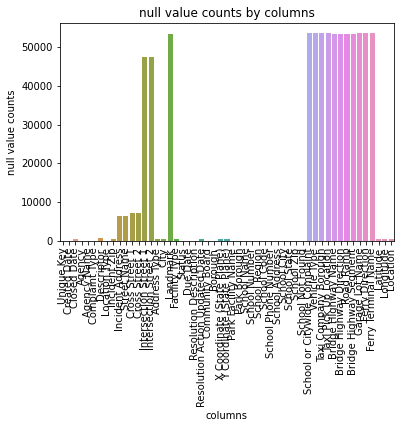

In [8]:
null_counts = service.isna().sum()
sns.barplot(x= null_counts.index,y= null_counts.values)
plt.xticks(rotation = 90)
plt.xlabel('columns')
plt.ylabel('null value counts')
plt.title('null value counts by columns')
plt.show()

In [9]:
drop_column_withnull = 'Closed Date'
df = service.dropna(subset =[drop_column_withnull])
df

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53545,31931618,11/07/2015 11:09:22 PM,11/07/2015 11:46:35 PM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10028.0,1664 1 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.777382,-73.948992,"(40.77738158844639, -73.94899244449249)"
53546,31932516,11/07/2015 11:08:46 PM,11/07/2015 11:33:37 PM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10024.0,503 COLUMBUS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.785360,-73.972982,"(40.78536042083817, -73.97298193186121)"
53547,31933535,11/07/2015 11:08:29 PM,11/08/2015 01:57:34 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,11206.0,247 VARET STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.704048,-73.934250,"(40.70404807317634, -73.93425038133091)"
53548,31936242,11/07/2015 11:08:20 PM,11/08/2015 01:57:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,151 MESEROLE STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708104,-73.943069,"(40.70810404540373, -73.94306883695855)"


In [10]:
df[drop_column_withnull] = pd.to_datetime(df[drop_column_withnull], errors='coerce')
print(df[drop_column_withnull])

0       2016-01-01 00:55:15
1       2016-01-01 01:26:57
2       2016-01-01 04:51:03
3       2016-01-01 07:43:13
4       2016-01-01 03:24:42
                ...        
53545   2015-11-07 23:46:35
53546   2015-11-07 23:33:37
53547   2015-11-08 01:57:34
53548   2015-11-08 01:57:32
53549   2015-11-08 03:20:19
Name: Closed Date, Length: 53251, dtype: datetime64[ns]


/tmp/ipykernel_72/358432680.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[drop_column_withnull] = pd.to_datetime(df[drop_column_withnull], errors='coerce')


In [11]:
len(df['Closed Date'])

53251

In [12]:
df['Created Date'] = pd.to_datetime(df['Created Date'])
df['Closed Date'] = pd.to_datetime(df['Closed Date'])
df['Time_Elapsed_in_Seconds'] = (df['Closed Date'] - df['Created Date']).dt.total_seconds()
df.head()

/tmp/ipykernel_72/3438808677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Created Date'] = pd.to_datetime(df['Created Date'])
/tmp/ipykernel_72/3438808677.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Closed Date'] = pd.to_datetime(df['Closed Date'])
/tmp/ipykernel_72/3438808677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Time_Elapsed_in_Seconds
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",3330.0
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",5233.0
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",17494.0
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",27927.0
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",12464.0


In [13]:
df['Time_Elapsed_in_Seconds'].describe()

count    5.325100e+04
mean     1.696566e+04
std      2.925604e+04
min      1.460000e+02
25%      4.698000e+03
50%      9.944000e+03
75%      1.972000e+04
max      2.078466e+06
Name: Time_Elapsed_in_Seconds, dtype: float64

In [14]:
df['Complaint Type'].isna().sum()

0

In [15]:
df['City'].isna().sum()

65

In [16]:
df['City'].fillna('UnKnown City',inplace= True)
df['City'].isna().sum()

/tmp/ipykernel_72/1915469634.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City'].fillna('UnKnown City',inplace= True)


0

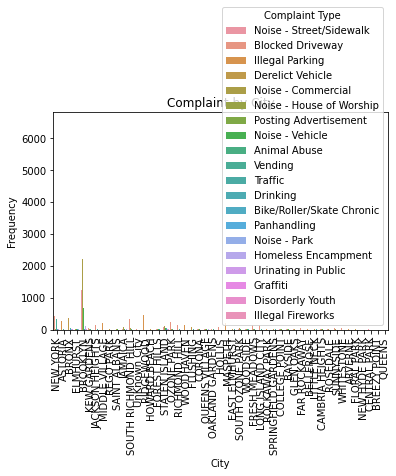

In [17]:
sns.countplot(data=df, x='City', hue='Complaint Type')
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Frequency')
plt.title('Complaint by City')
plt.legend(title='Complaint Type')
plt.show()

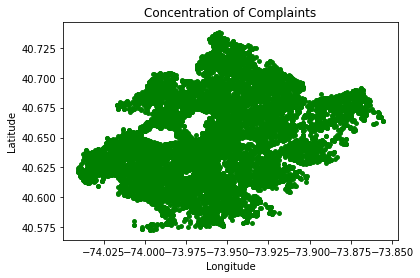

In [18]:
brooklyn_conc = df[df['City'] == 'BROOKLYN']
plt.scatter(brooklyn_conc['Longitude'], brooklyn_conc['Latitude'], s=15, c='green')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Concentration of Complaints')
plt.show()

In [19]:
complaint_types = df['Complaint Type'].value_counts().head(10)
print(complaint_types)

Blocked Driveway           16925
Illegal Parking            15242
Noise - Commercial          7077
Noise - Street/Sidewalk     4551
Derelict Vehicle            3191
Noise - Vehicle             2157
Animal Abuse                1307
Traffic                      734
Homeless Encampment          613
Vending                      523
Name: Complaint Type, dtype: int64


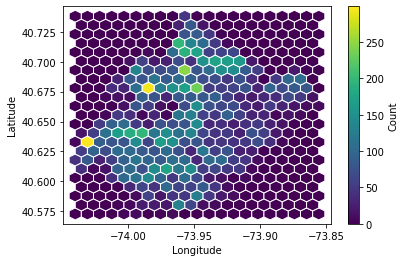

In [20]:
brooklyn_conc = df[df['City'] == 'BROOKLYN']
plt.hexbin(brooklyn_conc['Longitude'], brooklyn_conc['Latitude'], gridsize=20, color='purple', edgecolor='white')
plt.colorbar(label='Count')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

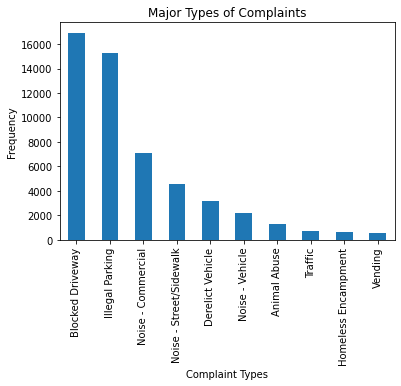

In [21]:
complaint_types.plot(kind='bar')
plt.xlabel('Complaint Types')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.title('Major Types of Complaints')
plt.show()

In [22]:
nyc_complaints = df[df['City'] == 'NEW YORK']
complains = nyc_complaints['Complaint Type'].value_counts()
print(complains)

Noise - Commercial           3242
Illegal Parking              2325
Noise - Street/Sidewalk      2151
Noise - Vehicle               907
Blocked Driveway              422
Homeless Encampment           409
Vending                       315
Traffic                       301
Animal Abuse                  287
Derelict Vehicle              130
Noise - Park                   93
Drinking                       37
Panhandling                    34
Urinating in Public            21
Noise - House of Worship       19
Bike/Roller/Skate Chronic      19
Posting Advertisement          11
Graffiti                        4
Disorderly Youth                2
Name: Complaint Type, dtype: int64


In [23]:
grouped_data = df.groupby(['City'])['Complaint Type'].unique()
for city, complaints in grouped_data.items():
 print('City: --{}--'.format(city))
 print('Complaint Types: --{}--'.format(complaints))
 print()


City: --ARVERNE--
Complaint Types: --['Illegal Parking' 'Noise - Commercial' 'Animal Abuse' 'Blocked Driveway'
 'Derelict Vehicle' 'Noise - Street/Sidewalk' 'Homeless Encampment'
 'Urinating in Public' 'Noise - Vehicle']--

City: --ASTORIA--
Complaint Types: --['Blocked Driveway' 'Noise - Commercial' 'Noise - Vehicle'
 'Illegal Parking' 'Noise - Street/Sidewalk' 'Bike/Roller/Skate Chronic'
 'Animal Abuse' 'Derelict Vehicle' 'Drinking' 'Homeless Encampment'
 'Urinating in Public' 'Traffic' 'Noise - House of Worship' 'Vending'
 'Noise - Park']--

City: --BAYSIDE--
Complaint Types: --['Blocked Driveway' 'Derelict Vehicle' 'Illegal Parking'
 'Noise - Street/Sidewalk' 'Noise - Vehicle' 'Animal Abuse'
 'Noise - Commercial' 'Homeless Encampment' 'Graffiti']--

City: --BELLEROSE--
Complaint Types: --['Derelict Vehicle' 'Blocked Driveway' 'Noise - Street/Sidewalk'
 'Noise - Commercial' 'Illegal Parking' 'Animal Abuse' 'Traffic']--

City: --BREEZY POINT--
Complaint Types: --['Noise - Street/Side

In [24]:
df_new = pd.pivot_table(df, index='Complaint Type', columns='City', aggfunc=len, fill_value=0)
print(df_new)

                          Address Type                                         \
City                           ARVERNE ASTORIA BAYSIDE BELLEROSE BREEZY POINT   
Complaint Type                                                                  
Animal Abuse                         5      25       6         1            0   
Bike/Roller/Skate Chronic            0       7       0         0            0   
Blocked Driveway                     5     593      68        19            1   
Derelict Vehicle                     7      63      36         8            0   
Disorderly Youth                     0       0       0         0            0   
Drinking                             0       4       0         0            0   
Graffiti                             0       0       2         0            0   
Homeless Encampment                  1       5       1         0            0   
Illegal Fireworks                    0       0       0         0            0   
Illegal Parking             

In [25]:
df['Request_Closing_Time'] = (df['Closed Date'] - df['Created Date']).dt.total_seconds()
grouped = df.groupby(['Location', 'Complaint Type'])['Request_Closing_Time'].mean()
sorted_data = grouped.groupby('Location', group_keys=False).apply(lambda x: x.sort_values())
print(sorted_data)

/tmp/ipykernel_72/1409952701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Request_Closing_Time'] = (df['Closed Date'] - df['Created Date']).dt.total_seconds()


Location                                  Complaint Type         
(40.50127930227959, -74.24042187057385)   Illegal Parking            28092.0
(40.50150020015795, -74.24499287548733)   Derelict Vehicle           18009.0
(40.50302866584165, -74.24773850760648)   Animal Abuse               10305.0
(40.50325068524659, -74.24013769473197)   Blocked Driveway            3436.0
(40.504403723723065, -74.23872144912642)  Noise - Street/Sidewalk     3521.0
                                                                      ...   
(40.91037364110772, -73.90218366704366)   Derelict Vehicle           18942.0
(40.91045209047415, -73.89769376844279)   Illegal Parking             1736.5
                                          Blocked Driveway           12456.0
(40.91071115910455, -73.90209272301259)   Derelict Vehicle            8262.0
(40.91153313134157, -73.8972868955454)    Illegal Parking             6868.0
Name: Request_Closing_Time, Length: 34079, dtype: float64


In [26]:
df['Response_Time'] = (df['Closed Date'] - df['Created Date']).dt.total_seconds()
avg_response_time = df.groupby('Complaint Type')['Response_Time'].mean()
ovr_avg_response_time = avg_response_time.mean()
print(avg_response_time)
print("Overall Average Response Time: {}".format(ovr_avg_response_time))

Complaint Type
Animal Abuse                 21466.442234
Bike/Roller/Skate Chronic    11195.148936
Blocked Driveway             18750.762718
Derelict Vehicle             27924.490755
Disorderly Youth             10375.181818
Drinking                     17863.976471
Graffiti                     23232.500000
Homeless Encampment          15301.662316
Illegal Fireworks            16701.333333
Illegal Parking              16937.394633
Noise - Commercial           11706.702416
Noise - House of Worship     10579.468750
Noise - Park                 14383.895735
Noise - Street/Sidewalk      13151.386948
Noise - Vehicle              13649.878535
Panhandling                  22765.528302
Posting Advertisement         4546.712177
Traffic                      14025.114441
Urinating in Public          13621.145455
Vending                      14626.229446
Name: Response_Time, dtype: float64
Overall Average Response Time: 15640.247770976242


/tmp/ipykernel_72/2687190511.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Response_Time'] = (df['Closed Date'] - df['Created Date']).dt.total_seconds()


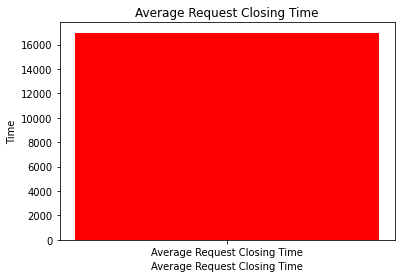

In [27]:
myavg_request_closing_time = df['Request_Closing_Time'].mean()
plt.bar('Average Request Closing Time', myavg_request_closing_time, color=['red', 'green', 'blue'])
plt.ylabel('Time')
plt.xlabel('Average Request Closing Time')
plt.title('Average Request Closing Time')
plt.show()

In [28]:
results = kruskal(df['Time_Elapsed_in_Seconds'], df['Incident Zip'])
p_value = results.pvalue
print('p-value:', p_value)
alpha = 0.10
if p_value > alpha:
 print('Fail to reject null hypothesis: All sample distributions are equal.')
else:
 print('Reject null hypothesis: At least one sample distribution is different.')

p-value: nan
Reject null hypothesis: At least one sample distribution is different.
